In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
sns.set_style("darkgrid")

df = pd.read_csv('data\hilda_baci_data.csv')

In [13]:
df.head()

,ID,Date,Content,Username,Retweets,Likes,Replies,Quote Tweets,Hashtags
0,1658985701155774465,2023-05-17 23:59:48+00:00,https://t.co/w4emTEmaJr,maara_e,0,0,1,0,NaN
1,1658985572138983425,2023-05-17 23:59:17+00:00,Hilda Baci really is that bitch! 🔥🔥🔥,Mahogvny,0,0,0,0,NaN
2,1658985543907135489,2023-05-17 23:59:10+00:00,https://t.co/dsr2XFC0ua,maara_e,0,0,4,0,NaN
3,1658985269872283649,2023-05-17 23:58:05+00:00,https://t.co/wSNHNg9LKP,maara_e,0,0,0,0,NaN
4,1658985188775325696,2023-05-17 23:57:46+00:00,https://t.co/J8vVniasfk,maara_e,0,0,0,0,NaN


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,1.658461e+18,2.197396e+14,1.658200e+18,1.658244e+18,1.658422e+18,1.658574e+18,1.658986e+18
Retweets,10000.0,8.151500e+00,2.342800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.175000e+04
Likes,10000.0,6.100330e+01,1.769716e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.557990e+05
Replies,10000.0,2.423200e+00,5.636938e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.998000e+03
Quote Tweets,10000.0,7.969000e-01,2.756374e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.241000e+03


In [15]:
df.isna().sum()

ID                 0
Date               0
Content            0
Username           0
Retweets           0
Likes              0
Replies            0
Quote Tweets       0
Hashtags        7279
dtype: int64

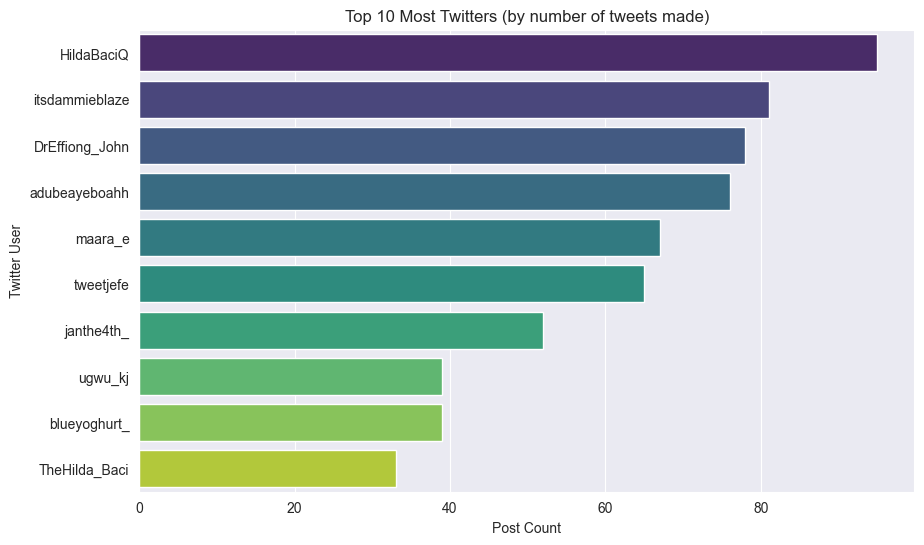

In [16]:
top_10_twitters = df['Username'].value_counts().head(10)

# Plot the top 10 most occurring values using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(y='Username', data=df, order=top_10_twitters.index, palette='viridis')
plt.xlabel('Post Count')
plt.ylabel('Twitter User')
plt.title('Top 10 Most Twitters (by number of tweets made)')
plt.show()

In [17]:
nltk.download('vader_lexicon')
# assigning sentiments of tweets using the vader lexicon

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet in the 'Content' column
df['Sentiment'] = df['Content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Print the DataFrame with the added 'Sentiment' column
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    ID                       Date   
0  1658985701155774465  2023-05-17 23:59:48+00:00  \
1  1658985572138983425  2023-05-17 23:59:17+00:00   
2  1658985543907135489  2023-05-17 23:59:10+00:00   
3  1658985269872283649  2023-05-17 23:58:05+00:00   
4  1658985188775325696  2023-05-17 23:57:46+00:00   

                                Content  Username  Retweets  Likes  Replies   
0               https://t.co/w4emTEmaJr   maara_e         0      0        1  \
1  Hilda Baci really is that bitch! 🔥🔥🔥  Mahogvny         0      0        0   
2               https://t.co/dsr2XFC0ua   maara_e         0      0        4   
3               https://t.co/wSNHNg9LKP   maara_e         0      0        0   
4               https://t.co/J8vVniasfk   maara_e         0      0        0   

   Quote Tweets Hashtags  Sentiment  
0             0      NaN     0.0000  
1             0      NaN    -0.6548  
2             0      NaN     0.0000  
3             0      NaN     0.0000  
4             0 

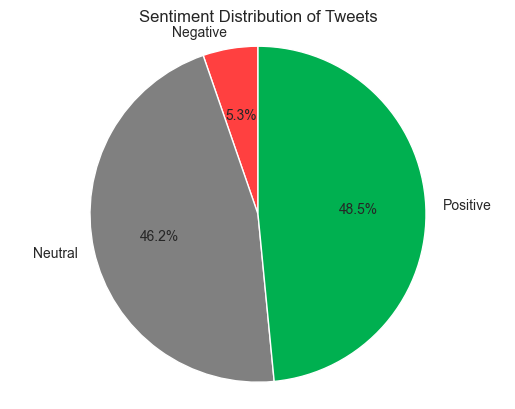

In [18]:
negative_sentiment = df[df['Sentiment'] < -0.5]
neutral_sentiment = df[df['Sentiment'] == 0]
positive_sentiment = df[df['Sentiment'] > 0.5]

# Calculate the counts for each category
negative_count = negative_sentiment.shape[0]
neutral_count = neutral_sentiment.shape[0]
positive_count = positive_sentiment.shape[0]

# Create a list of counts
sentiment_counts = [negative_count, neutral_count, positive_count]

# Define labels and colors
sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#FF4040', '#808080', '#00B050']

# Create a pie chart using Seaborn and Matplotlib
plt.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Sentiment Distribution of Tweets')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

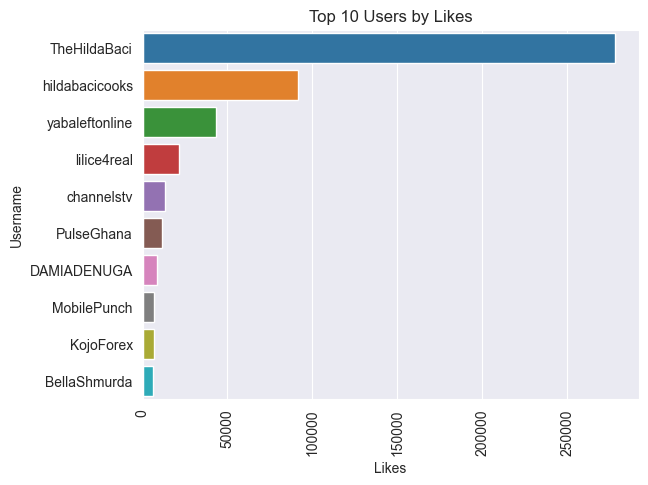

In [19]:


user_likes = df.groupby('Username')['Likes'].sum().reset_index()

top_10_users = user_likes.sort_values('Likes', ascending=False).head(10)

sns.barplot(y='Username', x='Likes', data=top_10_users)


plt.xticks(rotation=90)


plt.ylabel('Username')
plt.xlabel('Likes')
plt.title('Top 10 Users by Likes')


plt.show()


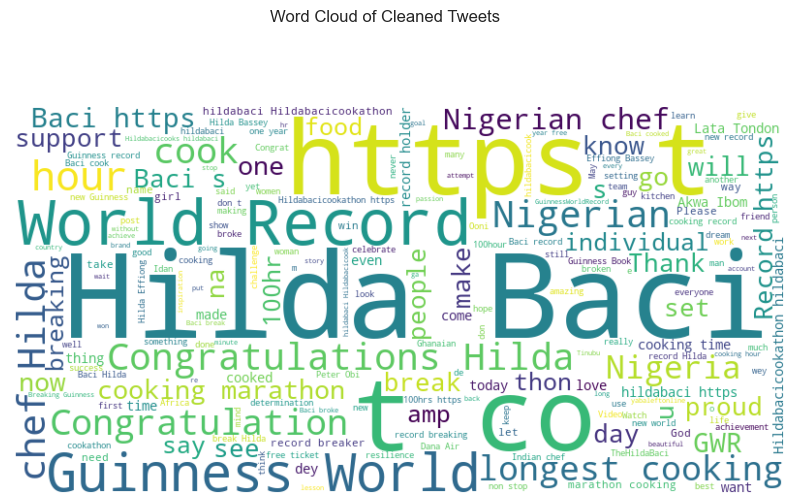

In [20]:
from wordcloud import WordCloud, STOPWORDS

df['clean_tweets'] = df['Content'].str.replace('[^a-zA-Z\s]', '')

# Join all cleaned tweets into a single string
all_tweets = ' '.join(df['clean_tweets'])

# Set the stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_tweets)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.suptitle('Word Cloud of Cleaned Tweets')

# Display the WordCloud
plt.show()
